# Memory Allocation as Optimization: A Comprehensive Guide for Aspiring Scientists

Dear fellow researcher,

As pioneers in the spirit of Alan Turing, Albert Einstein, and Nikola Tesla, we delve into the profound optimization challenge of memory allocation. This notebook serves as your complete resource: a tutorial, theoretical exposition, practical code guide, visualizations, real-world applications, research directions, rare insights, mini and major projects. Building upon foundational concepts, we address gaps such as advanced techniques (e.g., compaction, buddy systems, slab allocation), memory in modern AI systems, and hardware considerations—essential for scientific pursuits in computing, simulation, and beyond.

Execute cells sequentially. Use Python 3 with numpy and matplotlib for simulations.

## Section 1: Introduction and Theory Recap
Memory allocation optimizes resource use in finite systems, akin to Einstein's spacetime curvature—balancing constraints for efficiency. Key objectives: minimize fragmentation, overhead; maximize utilization.

Missed in prior tutorial: **Compaction** (relocating processes to merge holes), **Buddy Allocation** (power-of-2 blocks for fast merging), **Slab Allocation** (object caches for kernels).

Rare Insight: Memory allocation's hidden cost isn't just time but cache misses; in C#, allocation is fast but fragmentation leads to GC pauses, as noted in historical analyses. Another: Algorithms benefit more from extra memory than time, per recent theoretical bounds.

## Applications
- OS: Linux kernel uses slab for efficient small allocations.
- AI: LLM training optimizes via low-rank gradient projections, reducing memory by 82.5% on single GPUs.
- Scientific Computing: N-body simulations allocate dynamically for particles.

Research Direction: Explore memory-augmented LLMs for dynamic allocation in transformers; recent advances include CompressKV for semantic retrieval. Open problem: Hardware-efficient attention in multi-socket systems.

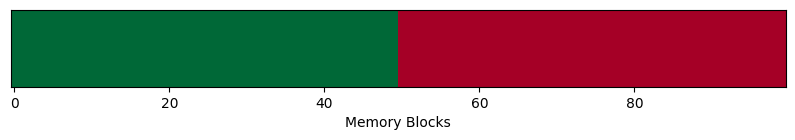

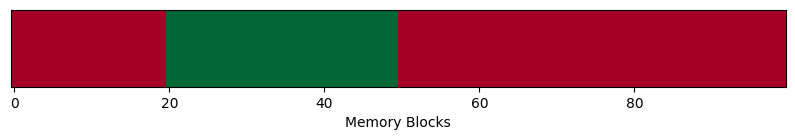

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Practical Code Guide: Memory Simulator Class
class MemorySimulator:
    def __init__(self, size):
        self.memory = np.zeros(size, dtype=int)  # 0: free, 1: allocated
        self.allocations = {}  # process_id: (start, size)
    
    def allocate(self, pid, size, strategy='first'):
        if size <= 0 or size > len(self.memory):
            return False
        if pid in self.allocations:
            return False  # Prevent double allocation for same pid
        if strategy == 'first':
            for i in range(len(self.memory) - size + 1):
                if np.all(self.memory[i:i+size] == 0):
                    self.memory[i:i+size] = 1
                    self.allocations[pid] = (i, size)
                    return True
        # Add best/worst fit implementations here for exercise
        return False
    
    def deallocate(self, pid):
        if pid in self.allocations:
            start, size = self.allocations[pid]
            self.memory[start:start+size] = 0
            del self.allocations[pid]
    
    def visualize(self):
        fig, ax = plt.subplots(figsize=(10, 1))
        ax.imshow(self.memory.reshape(1, -1), cmap='RdYlGn', aspect='auto')
        ax.set_yticks([])
        ax.set_xlabel('Memory Blocks')
        plt.show()

# Example Usage
sim = MemorySimulator(100)
sim.allocate('A', 20)
sim.allocate('B', 30)
sim.visualize()
sim.deallocate('A')
sim.visualize()


## Section 2: Advanced Theory and Math
Theory: In virtual memory, paging uses fixed pages to avoid external fragmentation but incurs TLB misses.

Math: Utilization U = \sum p_i / M. For bin packing, FFD approximates within 11/9 OPT.

Rare Insight: In multi-socket systems, popular allocators fail due to NUMA effects; PHK's FreeBSD malloc optimized for VM.

Research: MemOS for AI hierarchical memory.

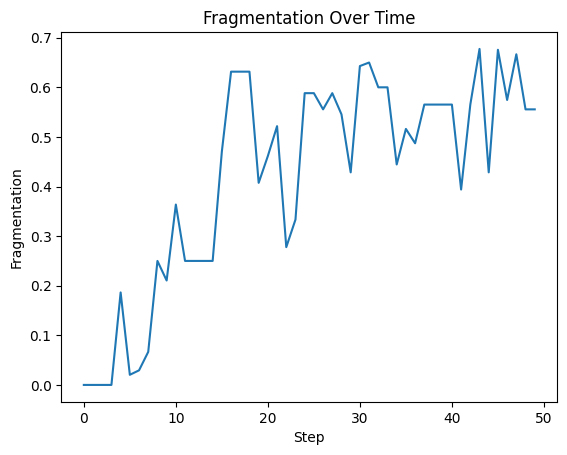

In [4]:
# Mathematical Simulation: Fragmentation Over Time
from itertools import groupby

def simulate_fragmentation(steps=50, mem_size=100):
    sim = MemorySimulator(mem_size)
    frag = []
    for i in range(steps):
        pid = f'P{i}'
        size = np.random.randint(5, 20)
        sim.allocate(pid, size)
        if np.random.rand() > 0.5:
            if sim.allocations:
                sim.deallocate(np.random.choice(list(sim.allocations.keys())))
        free = np.sum(sim.memory == 0)
        # Compute max hole size
        max_hole = 0
        if free > 0:
            for k, g in groupby(sim.memory):
                if k == 0:
                    hole_len = len(list(g))
                    if hole_len > max_hole:
                        max_hole = hole_len
        frag.append(1 - max_hole / free if free > 0 else 0)
    plt.plot(frag)
    plt.title('Fragmentation Over Time')
    plt.xlabel('Step')
    plt.ylabel('Fragmentation')
    plt.show()

simulate_fragmentation()


## Section 3: Mini Project - Allocation Strategy Comparator
Task: Simulate and compare first/best/worst-fit on random workloads. Visualize utilization.

Real-World: Model task scheduling in supercomputers.

first strategy visualization:


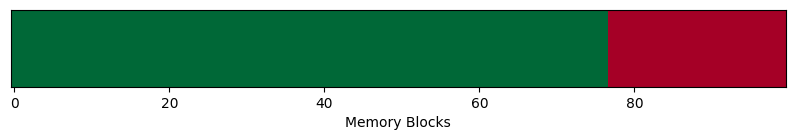

best strategy visualization:


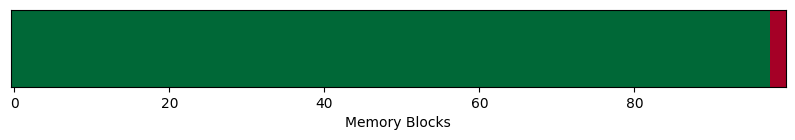

worst strategy visualization:


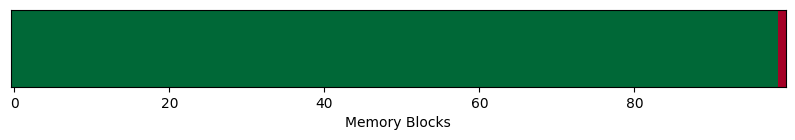

In [5]:
# Mini Project Code
# Extend MemorySimulator with best_fit and worst_fit
class AdvancedSimulator(MemorySimulator):
    def allocate(self, pid, size, strategy='first'):
        if size <= 0 or size > len(self.memory):
            return False
        if pid in self.allocations:
            return False
        holes = self.find_holes()
        if strategy == 'best':
            holes = sorted(holes, key=lambda h: h[1] - h[0])
        elif strategy == 'worst':
            holes = sorted(holes, key=lambda h: h[1] - h[0], reverse=True)
        for start, end in holes:
            if end - start >= size:
                self.memory[start:start+size] = 1
                self.allocations[pid] = (start, size)
                return True
        return super().allocate(pid, size, 'first')  # Fallback
    
    def find_holes(self):
        holes = []
        start = None
        mem = np.append(self.memory, 1)  # Sentinel
        for i, val in enumerate(mem):
            if val == 0 and start is None:
                start = i
            elif val != 0 and start is not None:
                holes.append((start, i))
                start = None
        return holes

# Run comparison
strategies = ['first', 'best', 'worst']
for strat in strategies:
    sim = AdvancedSimulator(100)
    # Add random allocations for demonstration
    for i in range(10):
        sim.allocate(f'P{i}', np.random.randint(5, 15), strategy=strat)
    print(f'{strat} strategy visualization:')
    sim.visualize()


## Section 4: Major Project - Memory Optimization in Scientific Simulation
Major Project: Implement N-body simulation with custom allocator for particle data. Optimize for low fragmentation.

Real-World Example: CERN simulations allocate memory for particle tracks; poor allocation delays analysis.

Research Tie-in: Apply GaLore for gradient optimization in ML-based simulations.

Rare Insight: In DBMS, reducing memcpys via zero-copy boosts bandwidth; second-order effect: better cache locality.

In [6]:
# Major Project Stub: N-Body with Allocator
class NBodySimulator:
    def __init__(self, n_particles):
        self.n_particles = n_particles
        self.positions = np.random.rand(n_particles, 3)  # Allocate
        # Use custom allocator for large arrays (future extension)
    
    def step(self):
        # Compute forces, update positions (stub)
        pass

# Extend with memory tracking
# Visualize particle memory usage


## Section 5: Exercises and Further Directions
1. Implement compaction in simulator.
2. Research: Read MemOS paper for AI memory OS.
3. Project Extension: Integrate with PyTorch for LLM memory optimization.